# Dynamic Process: Condorcet Profiles (5.2.1, 5.2.2, C.6)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from poisson_approval import *

In [2]:
N_SAMPLES = 10000
N_MAX_EPISODES = 1000

In [3]:
rand_profile = RandConditional(
    factory=RandProfileHistogramUniform(n_bins=1),
    test=is_condorcet,
    n_trials_max=None
)

In [4]:
results = monte_carlo_fictitious_play(
    factory=rand_profile,
    n_samples=N_SAMPLES,
    n_max_episodes=N_MAX_EPISODES,
    voting_rules=VOTING_RULES,
    init='random_tau',
    monte_carlo_settings=[
        MCS_PROFILE,
        MCS_TAU_INIT,
        MCS_CONVERGES,
        MCS_FREQUENCY_CW_WINS,
        MCS_WELFARE_LOSSES,
    ],
    file_save='sav/condorcet_profiles.sav',
)

## Convergence (5.2.1)

In [5]:
results[APPROVAL]['mean_converges']

0.9997

## Condorcet Consistency (5.2.2)

### Ratios

In [6]:
float(results[APPROVAL]['mean_frequency_cw_wins'])

0.999644653864655

In [7]:
float(results[PLURALITY]['mean_frequency_cw_wins'])

0.6605

In [8]:
float(results[ANTI_PLURALITY]['mean_frequency_cw_wins'])

0.49510742323833473

### Profiles where the CW is not elected with probability 1, under AV

Proportion of profiles where the CW is not elected with probability 1, under Approval:

In [9]:
np.sum(np.array(results[APPROVAL]['frequency_cw_wins']) < 1) / results[APPROVAL]['n_samples']

0.0006

In [10]:
counter_examples = [
    (profile, tau_init) 
    for (profile, tau_init, frequency_cw_wins) in zip(
        results[APPROVAL]['profile'], 
        results[APPROVAL]['tau_init'], 
        results[APPROVAL]['frequency_cw_wins']
    )
    if frequency_cw_wins < 1
]

Let us use a larger number of episodes to examine the counter-examples found above :

In [11]:
LARGE_N_MAX_EPISODES = 1000000
for profile, tau_init in counter_examples:
    results_p = profile.fictitious_play(
        init=tau_init, 
        n_max_episodes=LARGE_N_MAX_EPISODES,
        perception_update_ratio=one_over_log_t_plus_one,
        ballot_update_ratio=one_over_log_t_plus_one,
        winning_frequency_update_ratio=one_over_log_t_plus_one,
    )
    if not results_p['converges']:
        print('No convergence, even after %s episodes' % LARGE_N_MAX_EPISODES)
    else:
        print('Convergence in %s episodes' % results_p['n_episodes'])
        cw = list(profile.condorcet_winners)[0]
        if results_p['d_candidate_winning_frequency'][cw] == 1:
            print('The Condorcet winner is elected')
        else:
            print('Candidates winning frequencies: %s' % results_p['d_candidate_winning_frequency'])
            print('Condorcet winner: %s' % profile.condorcet_winners)
    print()

Convergence in 13966 episodes
The Condorcet winner is elected

Convergence in 43 episodes
Candidates winning frequencies: {a: 1}
Condorcet winner: b

Convergence in 39 episodes
Candidates winning frequencies: {b: 1}
Condorcet winner: a

Convergence in 1311 episodes
The Condorcet winner is elected

Convergence in 50 episodes
Candidates winning frequencies: {a: 1}
Condorcet winner: b

Convergence in 56282 episodes
The Condorcet winner is elected



## Welfare Losses (C.6)

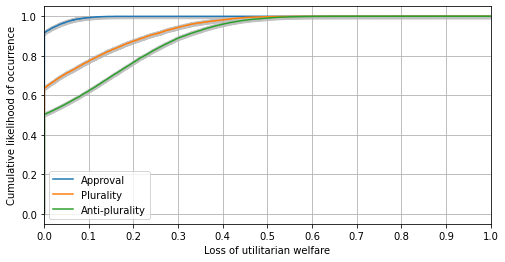

In [12]:
plot_welfare_losses(results, 'utilitarian_welfare_losses')
plt.savefig('img/fUWelfareCW.png', dpi=600, bbox_inches="tight")